In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d eldarsultanow/ml-bsd-dataset

 99% 1.49G/1.51G [00:13<00:00, 103MB/s]
100% 1.51G/1.51G [00:13<00:00, 120MB/s]


In [ ]:
! unzip ml-bsd-dataset.zip

Archive:  ml-bsd-dataset.zip
  inflating: rank-vs-ap.csv          


In [ ]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv("rank-vs-ap.csv", index_col=False)

In [ ]:
df.head()

,rank,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,...,ap_1218,ap_1219,ap_1220,ap_1221,ap_1222,ap_1223,ap_1224,ap_1225,ap_1226,ap_1227
0,1,0.707107,0.000000,0.000000,-0.755929,1.809068,-1.109400,0.000000,0.917663,-0.417029,...,-0.553582,-1.116551,-1.196781,-0.974837,-1.707961,-0.311200,-1.696032,-0.762636,-0.371096,0.421075
1,1,0.000000,1.154701,0.000000,-0.377964,0.000000,0.554700,0.727607,1.835326,1.668115,...,0.624038,-1.186964,1.729801,-1.869276,0.934355,-1.686506,0.662356,1.204162,-0.742193,-0.781997
2,1,0.707107,0.000000,-1.341641,0.755929,-1.206045,-1.664101,-0.242536,0.917663,-0.625543,...,0.312019,-1.599384,1.035869,1.276334,-0.974542,-0.240929,1.224354,-0.672324,0.671985,0.290742
3,0,-0.707107,0.000000,0.000000,1.889822,-0.301511,0.554700,-0.970143,1.147079,1.251086,...,-0.161042,-1.850859,1.387864,-0.291446,-0.341592,0.090349,-0.832962,0.642219,1.404148,1.022611
4,1,-0.707107,-1.154701,0.894427,-0.377964,0.000000,-0.554700,-0.970143,1.835326,0.000000,...,-1.892245,-1.549089,-0.100570,-0.422095,0.713325,1.023950,-1.264497,0.070243,-1.514474,0.401024


In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
exclude_ranks = [1, 2, 3, 4, 5, 6]  
X = X[~y.isin(exclude_ranks)]
y = y[~y.isin(exclude_ranks)]

In [ ]:
print(X.shape)
print(y.shape)

(42291, 1227)
(42291, 2)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping_monitor = EarlyStopping(patience=3)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping_monitor])


Epoch 1/10
3750/3750 [==============================] - 169s 45ms/step - loss: -194182928.0000 - accuracy: 0.4176 - val_loss: -279521824.0000 - val_accuracy: 0.4199
Epoch 2/10
3750/3750 [==============================] - 174s 46ms/step - loss: -414072928.0000 - accuracy: 0.4176 - val_loss: -546135104.0000 - val_accuracy: 0.4199
Epoch 3/10
3750/3750 [==============================] - 169s 45ms/step - loss: -748526080.0000 - accuracy: 0.4176 - val_loss: -933955968.0000 - val_accuracy: 0.4199
Epoch 4/10
3750/3750 [==============================] - 173s 46ms/step - loss: -1218958848.0000 - accuracy: 0.4176 - val_loss: -1462630656.0000 - val_accuracy: 0.4199
Epoch 5/10
3750/3750 [==============================] - 170s 45ms/step - loss: -1844185344.0000 - accuracy: 0.4176 - val_loss: -2155867136.0000 - val_accuracy: 0.4199
Epoch 6/10
3750/3750 [==============================] - 173s 46ms/step - loss: -2649931008.0000 - accuracy: 0.4176 - val_loss: -3037728000.0000 - val_accuracy: 0.4199
Epoc

In [ ]:
y_pred = model.predict(X_test)


938/938 [==============================] - 14s 14ms/step


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)


In [ ]:
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4199


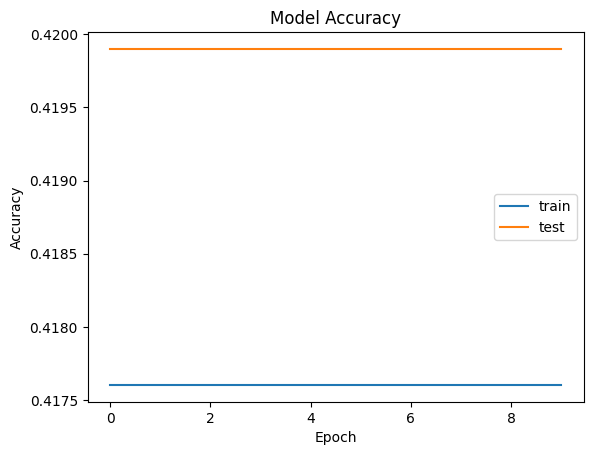

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()